## Acknowledgments
This project uses [Albumentations](https://albumentations.ai), a library for fast and flexible image augmentations. If you use this library in your project, please cite the following paper:
@article{info11020125,
    author = {Buslaev, Alexander and Parinov, Alexander and Khvedchenya, Evgenii and Iglovikov, Vladimir I. and Kalinin, Alexey A.},
    title = {Albumentations: Fast and Flexible Image Augmentations},
    journal = {Information},
    volume = {11},
    year = {2020},
    number = {2},
    article-number = {125},
    url = {https://www.mdpi.com/2078-2489/11/2/125},
    doi = {10.3390/info11020125}
}


In [1]:
import os
import cv2
import albumentations as A
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:

def augment_image_and_mask(image, mask, scale_limits):
    """
    Applies basic augmentations to an image and mask for aerial segmentation.

    Args:
        image (np.array): Input RGB image.
        mask (np.array): Corresponding grayscale mask.
        scale_limit (tupel): scaling factor range. If scale_limit is a single float value, the range will be (-scale_limit, scale_limit)

    Returns:
        tuple: Augmented image and mask.
    """
    # Define augmentation pipeline
    aug_pipeline = A.Compose([
        A.RandomBrightnessContrast(p=0.2),          # Adjust brightness/contrast
        A.HorizontalFlip(),
        A.ShiftScaleRotate(shift_limit=1,           # Random shift/scale/rotate
                           scale_limit=scale_limits, p=1)
    ], additional_targets={'mask': 'mask'})         # Ensure mask is augmented

    # Apply augmentations
    augmented = aug_pipeline(image=image, mask=mask)
    return augmented['image'], augmented['mask']

def visualize(image, mask, augmented_image, augmented_mask):
    """
    Visualize original and augmented image-mask pairs.

    Args:
        image (np.array): Original image.
        mask (np.array): Original mask.
        augmented_image (np.array): Augmented image.
        augmented_mask (np.array): Augmented mask.
    """
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax[0, 0].imshow(image)
    ax[0, 0].set_title("Original Image")
    ax[0, 1].imshow(mask, cmap='gray')
    ax[0, 1].set_title("Original Mask")
    ax[1, 0].imshow(augmented_image)
    ax[1, 0].set_title("Augmented Image")
    ax[1, 1].imshow(augmented_mask, cmap='gray')
    ax[1, 1].set_title("Augmented Mask")
    plt.tight_layout()
    plt.show()



In [18]:
def create_folder(folder_path):
    # creates a folder, if it does not already exists
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"folder '{folder_path}' created.")
    else:
        print(f"folder '{folder_path}' already exists.")

In [25]:

# The path of the directories where all the input images and masks are 
input_images_dir = 'C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\training\\images\\'
input_masks_dir = 'C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\training\\groundtruth\\'

# the list of paths to every image in the images dir and every mask in the masks dir 
all_input_images_paths = os.listdir(input_images_dir)
all_input_masks_paths = os.listdir(input_masks_dir)

# the path of the directories of the augmented images / masks
output_images_dir = 'C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\training\\augmented_images\\'
output_masks_dir  = 'C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\training\\augmented_groundtruth\\'

# create these folders if they do not already exist
create_folder(output_images_dir)
create_folder(output_masks_dir)


folder 'C:\Users\Gauthier\Desktop\EPFL\Master\Machine Learning\projet\project_2\test\training\augmented_images\' already exists.
folder 'C:\Users\Gauthier\Desktop\EPFL\Master\Machine Learning\projet\project_2\test\training\augmented_groundtruth\' already exists.


In [ ]:
num_augment = 50 # number of augmented images from one single input image

for image_name, mask_name in tqdm(zip(all_input_images_paths, all_input_masks_paths), # tqdm is just to have a progression bar
                                  total=len(all_input_images_paths), 
                                  desc="Augmenting images"):

    # the full path to the image / mask
    image_path = input_images_dir + image_name
    mask_path  = input_masks_dir   + mask_name

    # gives an image ( numpy array ) from the image path
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None: # sanity chek, raise an error if the image is not found. 
        raise FileNotFoundError(f"These files cannot be found :\nImage: {image_path} \nMask: {mask_path} \nMay have a wrong path.")

    for n in range(num_augment):

        augmented_image, augmented_mask = augment_image_and_mask(image, mask,(0.3, 3))

        output_image_path = output_images_dir + image_name[:-4] + '_augmentation_' + str(n+1) + '.png'
        output_mask_path  = output_masks_dir  + mask_name[:-4]  + '_augmentation_' + str(n+1) + '.png'
        
        cv2.imwrite(output_image_path, augmented_image)
        cv2.imwrite(output_mask_path, augmented_mask)


Processing images: 100%|██████████| 100/100 [00:53<00:00,  1.87it/s]


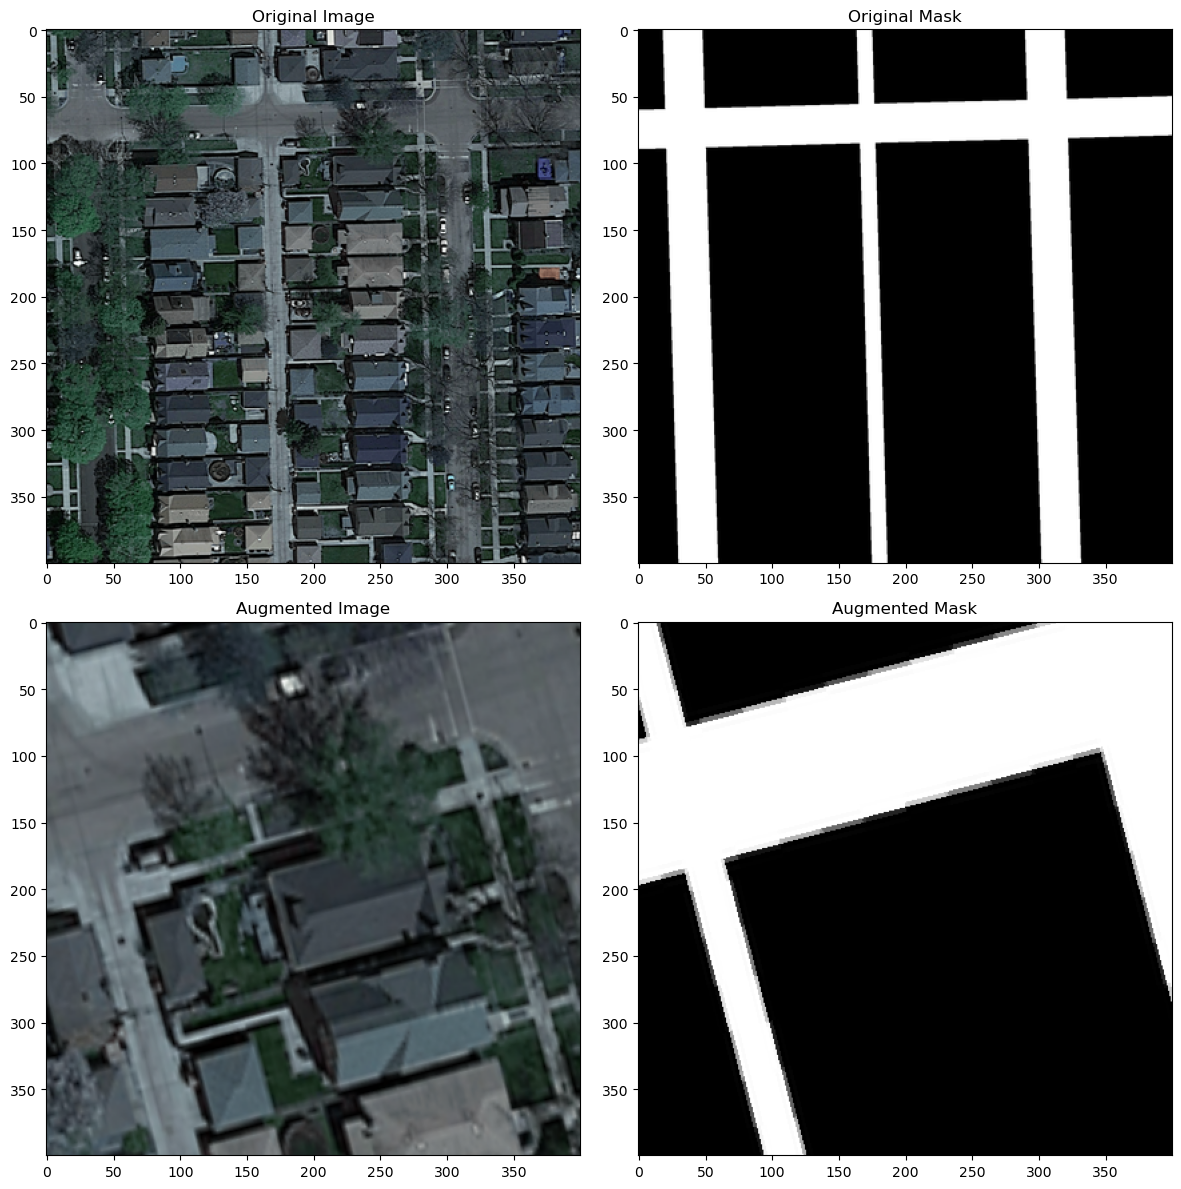

In [ ]:
# Load image and mask you want to check
input_test_image_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\training\\images\\satImage_007.png"
input_test_mask_path  = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\training\\groundtruth\\satImage_007.png"

image = cv2.imread(input_test_image_path)
mask  = cv2.imread(input_test_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply augmentations
augmented_image, augmented_mask = augment_image_and_mask(image, mask,(0.3, 3))

# Visualize results
visualize(image, mask, augmented_image, augmented_mask)